In [55]:
import os
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
coactivation_path = r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\6o Semestre\MODELOS\D4atasets\Coactivation_matrix.mat"

mat = scipy.io.loadmat(coactivation_path)
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


(638, 638)


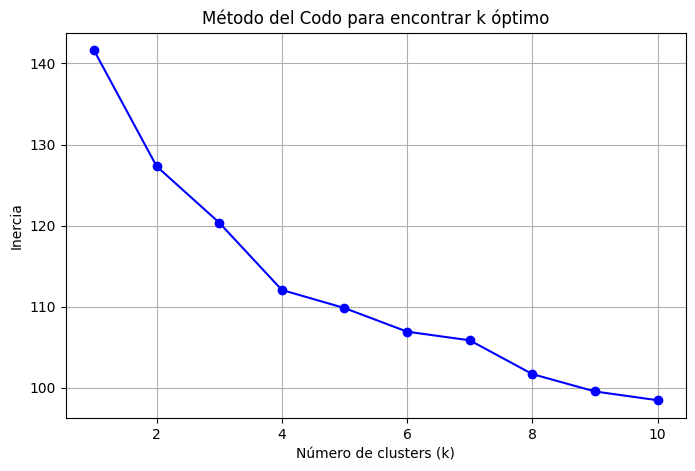

In [57]:
data = mat['Coactivation_matrix']
print(data.shape)

# Aplicar el método del codo
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar k óptimo')
plt.grid(True)
plt.show()

In [58]:
# Número de clusters óptimos: 4

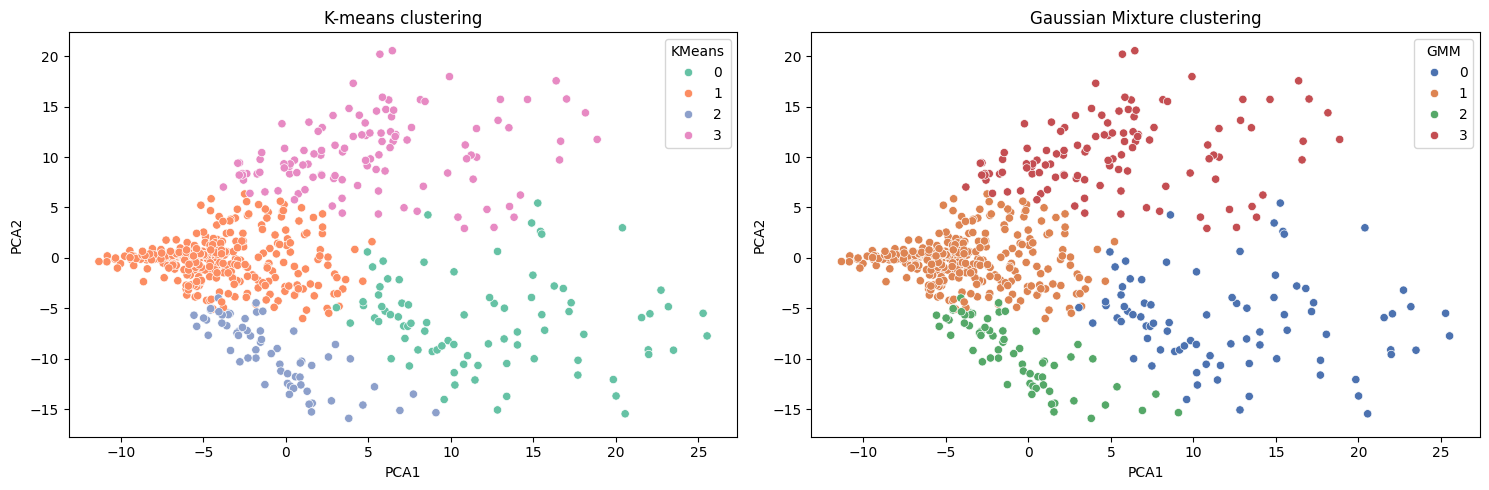

In [59]:
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

df = pd.DataFrame(X_std, columns=[f"Feature{i+1}" for i in range(X_std.shape[1])])

kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X_std)
df['KMeans'] = labels_kmeans

gm = GaussianMixture(n_components=4, random_state=0).fit(X_std)
labels_gmm = gm.predict(X_std)
df['GMM'] = labels_gmm

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans', palette='Set2', ax=axes[0])
axes[0].set_title('K-means clustering')

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='GMM', palette='deep', ax=axes[1])
axes[1].set_title('Gaussian Mixture clustering')

plt.tight_layout()
plt.show()

In [60]:
# La razón por la que los resultados de K-means y Gaussian Mixture Models (GMM) salieron exactamente iguales podría ser porque los clusters
# en Coactivation_Matrix están muy bien definidos, son isotrópicos y no presentan solapamientos muy significativos. Esto permite que ambos 
# métodos encuentren las mismas agrupaciones.

In [61]:
# BRAIN TUMOR

In [62]:
pathBT = r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\6o Semestre\MODELOS\D4atasets\Brain Tumor.csv"
dfbt = pd.read_csv(pathBT)

dfbt = dfbt.drop(columns=["Coarseness"])

print(dfbt.head(2))

Xbt = dfbt.iloc[:, 2:]
print()
print("\n", Xbt.head())

    Image  Class      Mean    Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339  619.587845           24.891522  0.109059   
1  Image2      0  8.749969  805.957634           28.389393  0.266538   

   Skewness   Kurtosis   Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575  98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618  63.858816  0.475051  0.225674     0.651352   

   Dissimilarity  Correlation  
0       4.473346     0.981939  
1       3.220072     0.988834  


        Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0  6.535339   619.587845           24.891522  0.109059  4.276477  18.900575   
1  8.749969   805.957634           28.389393  0.266538  3.718116  14.464618   
2  7.341095  1143.808219           33.820234  0.001467  5.061750  26.479563   
3  5.958145   959.711985           30.979219  0.001477  5.677977  33.428845   
4  7.315231   729.540579           27.010009  0.146761  4.283221  19.079108   

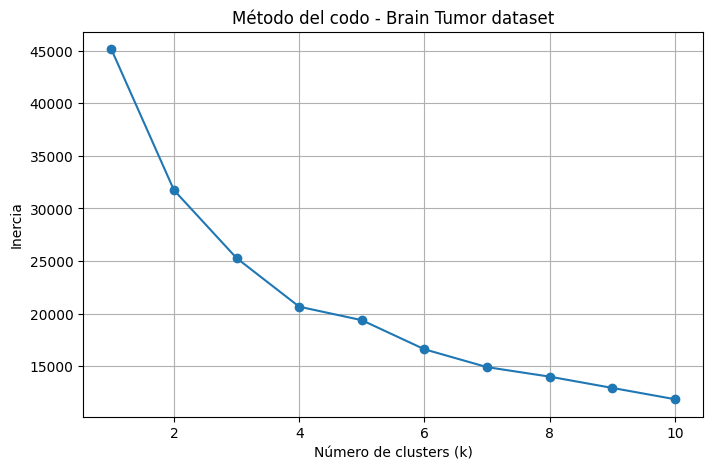

In [63]:
scaler = StandardScaler()
Xbt_std = scaler.fit_transform(Xbt)

inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Xbt_std)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Método del codo - Brain Tumor dataset')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [64]:
# Número de clusters óptimo: 4

In [65]:
print(dfbt.head(2))

    Image  Class      Mean    Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339  619.587845           24.891522  0.109059   
1  Image2      0  8.749969  805.957634           28.389393  0.266538   

   Skewness   Kurtosis   Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575  98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618  63.858816  0.475051  0.225674     0.651352   

   Dissimilarity  Correlation  
0       4.473346     0.981939  
1       3.220072     0.988834  


In [66]:
newbt = dfbt.iloc[:, 1:]
print()
print("\n", newbt.head())



    Class      Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      0  6.535339   619.587845           24.891522  0.109059  4.276477   
1      0  8.749969   805.957634           28.389393  0.266538  3.718116   
2      1  7.341095  1143.808219           33.820234  0.001467  5.061750   
3      1  5.958145   959.711985           30.979219  0.001477  5.677977   
4      0  7.315231   729.540579           27.010009  0.146761  4.283221   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0  18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1  14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2  26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3  33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4  19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   

   Correlation  
0     0.981939  
1     0.988834  
2     0.978014  
3     0.964189  
4   

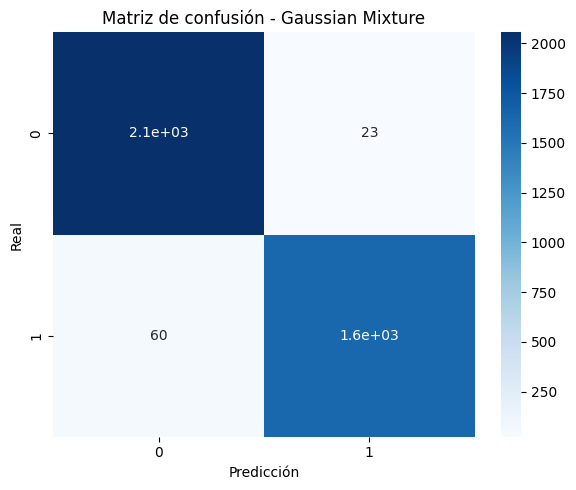

Matriz de confusión - Gaussian Mixture:
 [[2056   23]
 [  60 1623]]

Gaussian Mixture Metrics:
Accuracy: 0.978
Precision: 0.978
Recall: 0.978
F1-Score: 0.978


In [67]:
### GAUSSIAN MIXTURE

etiquetas_reales = newbt["Class"]
X_datos = newbt.drop(columns=["Class"])

scaler = StandardScaler()
X_std = scaler.fit_transform(X_datos)

gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(X_std)
labels = gm.predict(X_std)

newbt['modelo Gaussiano'] = labels

categorias = etiquetas_reales.unique()
cm_gauss = confusion_matrix(etiquetas_reales, newbt['modelo Gaussiano'], labels=categorias)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gauss, annot=True, cmap="Blues",
            xticklabels=categorias, yticklabels=categorias).set_title("Matriz de confusión - Gaussian Mixture")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Matriz de confusión - Gaussian Mixture:\n", cm_gauss)

# PRECISION, ACCURACY, F1-SCORE Y RECALL
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(etiquetas_reales, newbt['modelo Gaussiano'])
precision = precision_score(etiquetas_reales, newbt['modelo Gaussiano'], average='weighted')
recall = recall_score(etiquetas_reales, newbt['modelo Gaussiano'], average='weighted')
f1 = f1_score(etiquetas_reales, newbt['modelo Gaussiano'], average='weighted')

print()
print('Gaussian Mixture Metrics:')
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

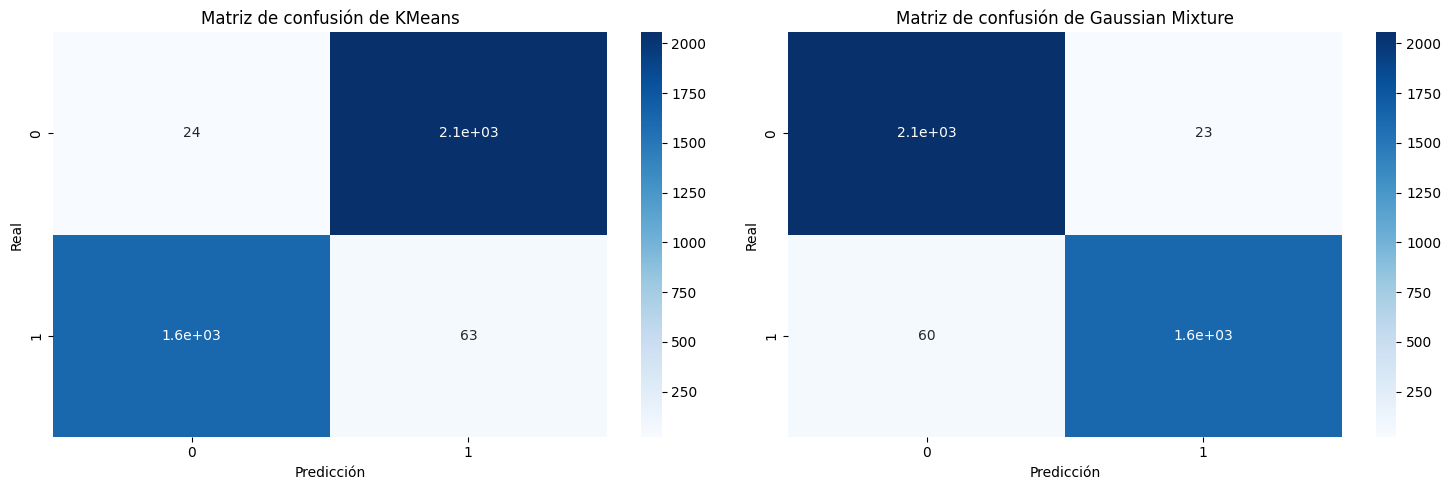

Matriz de confusión KMeans:
 [[  24 2055]
 [1620   63]]
Matriz de confusión Gaussian Mixture:
 [[2056   23]
 [  60 1623]]

K-MEANS METRICS:
Accuracy: 0.023
Precision: 0.021
Recall: 0.023
F1-Score: 0.022


In [68]:
### K-MEANS

scaler = StandardScaler()
X_newbt_std = scaler.fit_transform(newbt.iloc[:, 1:])  # Excluye la columna 'Class'

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_newbt_std)

newbt['kmeans'] = kmeans.labels_

etiquetas_reales = newbt['Class']
categorias = etiquetas_reales.unique()

cm_kmeans = confusion_matrix(etiquetas_reales, newbt['kmeans'], labels=categorias)
cm_gauss = confusion_matrix(etiquetas_reales, newbt['modelo Gaussiano'], labels=categorias)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=categorias, yticklabels=categorias,
            cmap="Blues", ax=axes[0]).set_title("Matriz de confusión de KMeans")
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=categorias, yticklabels=categorias,
            cmap="Blues", ax=axes[1]).set_title("Matriz de confusión de Gaussian Mixture")
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

print("Matriz de confusión KMeans:\n", cm_kmeans)
print("Matriz de confusión Gaussian Mixture:\n", cm_gauss)


### PRECISION, ACCURACY, RECALL Y F1-SCORE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_kmeans = newbt['kmeans']
y_true = newbt['Class']

accuracy_kmeans = accuracy_score(y_true, y_pred_kmeans)
precision_kmeans = precision_score(y_true, y_pred_kmeans, average='weighted')
recall_kmeans = recall_score(y_true, y_pred_kmeans, average='weighted')
f1_kmeans = f1_score(y_true, y_pred_kmeans, average='weighted')

print()
print('K-MEANS METRICS:')
print(f"Accuracy: {accuracy_kmeans:.3f}")
print(f"Precision: {precision_kmeans:.3f}")
print(f"Recall: {recall_kmeans:.3f}")
print(f"F1-Score: {f1_kmeans:.3f}")

In [69]:
print("Matriz de confusión KMeans:\n", cm_kmeans)

Matriz de confusión KMeans:
 [[  24 2055]
 [1620   63]]


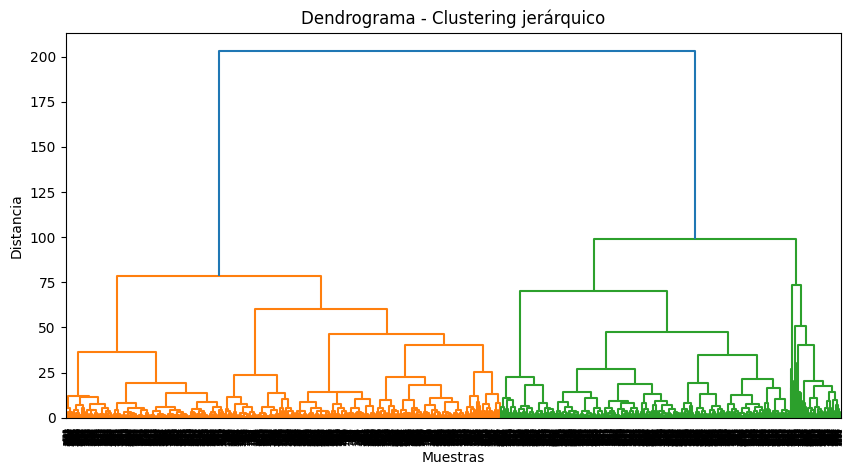

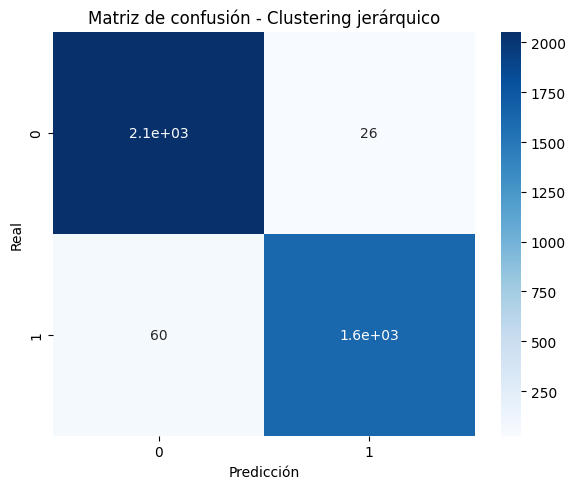

Matriz de confusión - Clustering jerárquico:
 [[2053   26]
 [  60 1623]]

Clustering jerárquico métricas:
Accuracy: 0.977
Precision: 0.977
Recall: 0.977
F1-Score: 0.977


In [70]:
### CLUSTERING JERÁRQUICO

scaler = StandardScaler()
Xbt_std = scaler.fit_transform(newbt.iloc[:, 1:])  # excluyendo "Class"

Z = linkage(Xbt_std, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

clusters = fcluster(Z, t=2, criterion='maxclust')
newbt['jerarquico'] = clusters - 1  # comenzar desde 0

etiquetas_reales = newbt['Class']
categorias = etiquetas_reales.unique()

cm_jerarq = confusion_matrix(etiquetas_reales, newbt['jerarquico'], labels=categorias)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_jerarq, annot=True, cmap="Blues", 
            xticklabels=categorias, yticklabels=categorias).set_title("Matriz de confusión - Clustering jerárquico")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Matriz de confusión - Clustering jerárquico:\n", cm_jerarq)

### ACCURACY, RECALL, F1-SCORE Y PRECISION
y_pred_jerarq = newbt['jerarquico']
y_true = newbt['Class']

accuracy_jerarq = accuracy_score(y_true, y_pred_jerarq)
precision_jerarq = precision_score(y_true, y_pred_jerarq, average='weighted')
recall_jerarq = recall_score(y_true, y_pred_jerarq, average='weighted')
f1_jerarq = f1_score(y_true, y_pred_jerarq, average='weighted')

print()
print('Clustering jerárquico métricas:')
print(f"Accuracy: {accuracy_jerarq:.3f}")
print(f"Precision: {precision_jerarq:.3f}")
print(f"Recall: {recall_jerarq:.3f}")
print(f"F1-Score: {f1_jerarq:.3f}")

In [71]:
# ¿Qué método recomendarías para este dataset?, ¿por qué?

# Al comparar las matrices de confusión, el modelo de Gaussian Mixture muestra el mejor desempeño, con 2056 y 1623 clasificaciones 
# correctas respectivamente y solo 83 errores en total. El clustering jerárquico tuvo un rendimiento muy similar, con 86 errores, pero 
# ligeramente por debajo. En cambio, KMeans mostró una inversión en las clases y una alta cantidad de errores (3245), lo que lo vuelve 
# poco confiable para este dataset. Por lo tanto, recomendaría usar Gaussian Mixture para este dataset en concreto, ya que  de los 3 es el que 
# mejor se adapta a los datos.

In [72]:
# Qué es precision?, qué es accuracy? qué es recall? qué es f1-score? cómo se relacionan las definiciones anteriores a la matriz de confusión?

# En el contexto de las matrices de confusión y clasificación de modelos, la precisión (precision) mide la exactitud de las predicciones positivas. 
# Se calcula como la proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP), indicando cuán confiables son las 
# predicciones positivas del modelo. 

# La precisión global (accuracy) representa la proporción de predicciones correctas (positivas y negativas) sobre
# el total. Es útil cuando las clases están equilibradas, pero puede ser engañosa en casos desbalanceados.

# El recall o sensibilidad mide la capacidad del modelo para identificar correctamente las instancias positivas. Se calcula como la proporción 
# de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos (TP + FN). Es clave cuando es crítico minimizar los falsos 
# negativos, como en la detección de enfermedades.

# El F1-Score es la media armónica entre la precisión y el recall, proporcionando una medida equilibrada del rendimiento del modelo. Es útil en 
# escenarios con clases desbalanceadas, ya que penaliza tanto falsos positivos como falsos negativos.

# Estas métricas se derivan de la matriz de confusión, que incluye:
### True Positives (TP): positivos correctamente clasificados.
### False Positives (FP): negativos clasificados erróneamente como positivos.
###True Negatives (TN): negativos correctamente clasificados.
###False Negatives (FN): positivos clasificados erróneamente como negativos.

# Las fórmulas son:
### Accuracy = (TP + TN) / (TP + TN + FP + FN)
### Precision = TP / (TP + FP)
### Recall = TP / (TP + FN)
### F1-Score = 2 × (Precision × Recall) / (Precision + Recall)

In [73]:
# Calcular PRECISION, ACCURACY, F1-SCORE Y RECALL

## Están distribuidos por todo el código